In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('datasets/iris.data', names=cols)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_test_pred = model.predict(X_test)
print("Predicted values: ", y_test_pred)
print("Actial    values: ", y_test)

Predicted values:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Actial    values:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [9]:
accuracy = model.score(X_test, y_test)
print("Model accuracy:{:.2f}".format(accuracy))

Model accuracy:0.97


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')
print(scores)

[0.97368421 0.94736842 0.94594595 1.        ]


In [11]:
print('Average cross valication model accuracy: {: .3f}'.format(scores.mean()))

Average cross valication model accuracy:  0.967


In [16]:
k_list = range(1, 30)
ave_scores = []
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')
    ave_scores.append(round(scores.mean(), 3))

print(ave_scores)

[0.96, 0.953, 0.96, 0.953, 0.967, 0.953, 0.967, 0.96, 0.953, 0.967, 0.96, 0.96, 0.967, 0.967, 0.967, 0.973, 0.96, 0.967, 0.96, 0.973, 0.967, 0.953, 0.96, 0.953, 0.953, 0.953, 0.946, 0.953, 0.953]


<Figure size 576x432 with 0 Axes>

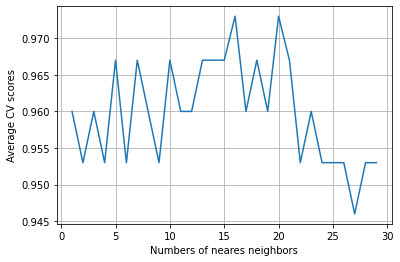

<Figure size 576x432 with 0 Axes>

In [17]:
plt.plot(k_list, ave_scores)
plt.xlabel('Numbers of neares neighbors')
plt.ylabel('Average CV scores')
plt.grid()
plt.figure(figsize=(8, 6))